<a href="https://colab.research.google.com/github/shweta1106/Play-store-data-analysis/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
##Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
##Explore and analyze the data to discover key factors responsible for app engagement and success.

In [2]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno

In [3]:
# Give path to access the data
path='/content/drive/MyDrive/capstone project 1/Copy of Play Store Data.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read files using pandas modules
df=pd.read_csv(path)

#Understand the Data

>Here we try to read the all possible properties of the data







In [6]:
# Read the first five rows in the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Read the last five rows of the data
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
# Check the information in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#Check the shape of the data
df.shape

(10841, 13)

In [10]:
#Checking column names in the dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
#Look for the number of unique Apps
df['App'].nunique()

9660

In [12]:
#Checking unique categories in the data
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
#Total number of unique categories
# There are 34 different categoris
df['Category'].nunique()

34

In [14]:
# The gradation of installations in the dataframe
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [15]:
# There are a lot of app sizes

df["Size"].nunique()

462

In [16]:
# Looking unique ratings in the dataframe
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [17]:
#Checking number of unique values for the rating
#There are 40 unique ratings in the dataframe
df['Rating'].nunique()

40

In [18]:
# Viewing the content rating; who is permitted to download these apps
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [19]:
# the number of categories of the age content rating

len(df["Content Rating"].unique())

7

#Data Cleaning
> Here we will delete the duplicated rows and will remove the Nan entries. Also, we will try to convert the possible columns to numeric entries that helps us to analyse data.

In [20]:
#Dropping duplicated rows
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
df.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [21]:
#Now check new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10350 non-null  object 
 1   Category        10350 non-null  object 
 2   Rating          8885 non-null   float64
 3   Reviews         10350 non-null  object 
 4   Size            10350 non-null  object 
 5   Installs        10350 non-null  object 
 6   Type            10349 non-null  object 
 7   Price           10350 non-null  object 
 8   Content Rating  10349 non-null  object 
 9   Genres          10350 non-null  object 
 10  Last Updated    10350 non-null  object 
 11  Current Ver     10342 non-null  object 
 12  Android Ver     10347 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


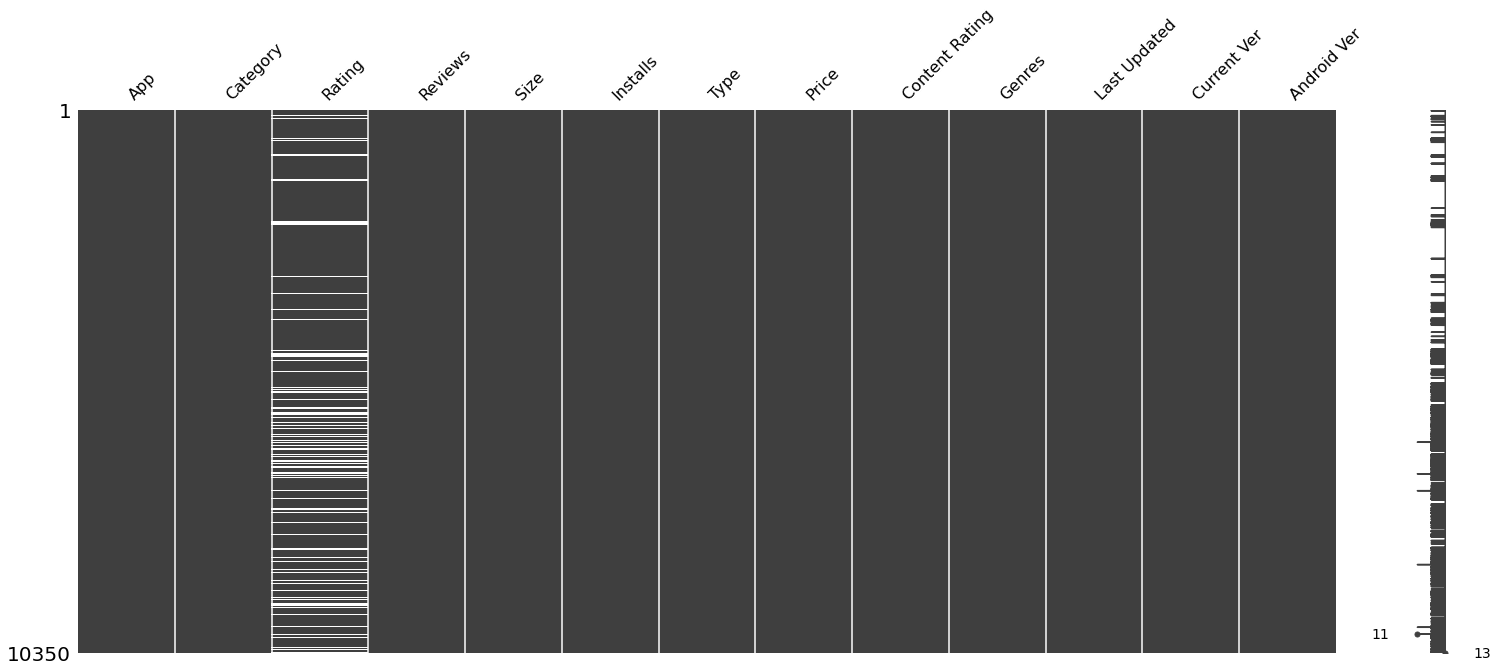

In [22]:
# The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
# The column of rating contains the most nan values
msno.matrix(df)

In [23]:
#Checking each column in the data for null values
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [24]:
# There are totally 13 empty data entries which will be dropped
len(df.isnull().sum())

13

In [25]:
# Dropping the entries where there are missing values

df=df.dropna()

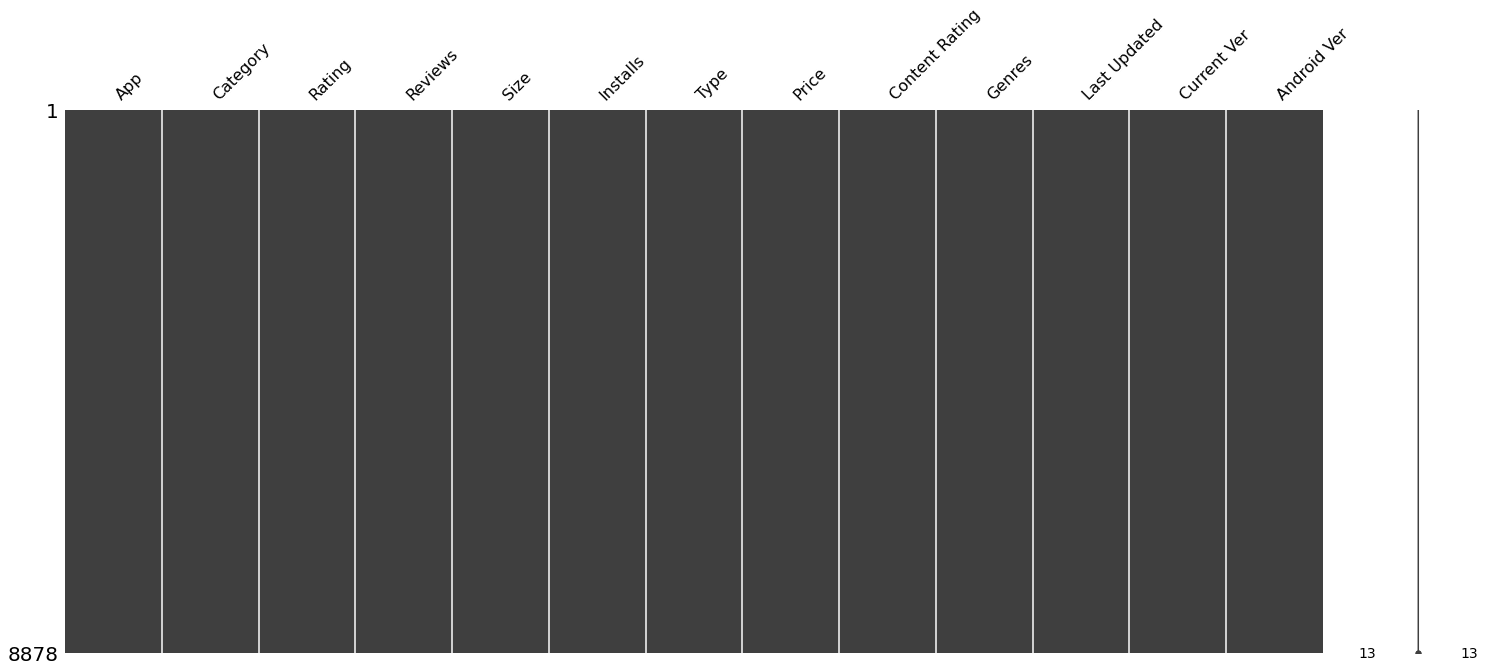

In [26]:
# The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
msno.matrix(df)

In [27]:
#Ensuring there are no longer missing values
df.isnull().any()

# False for every category means that there are no longer missing values

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [28]:
#Again check for the shape of new formed data frame
df.shape

(8878, 13)

In [29]:
df.App.nunique()

8190

In [30]:
len(df['App'])

8878

In [31]:
#There are 8878 rows, so we set new index in the range (0,8884,1)
# First we create a column named id in the given dataframe
id=np.arange(8878)
df['id']=id

In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [33]:
#set the index for dataframe
df=df.set_index('id')

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
id,,,,,,,,,,,,,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Exploring the Data
> The key variables responsible for the engagement of the app are the columns of the data viz Category, Rating, Installs, Reviews, Content Reviews and Type of the App. So we analyze the data accordingly.

In [35]:
#Checking unique categories in the Type of the Apps
df["Type"].value_counts() 

Free    8268
Paid     610
Name: Type, dtype: int64

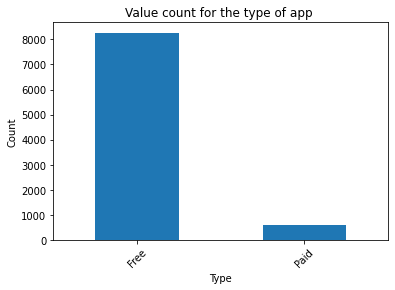

In [36]:
df["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation=45)

plt.show()

In [37]:
#Looking for the description of data set
df.describe()

,Rating
count,8878.000000
mean,4.187745
std,0.522572
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [38]:
# Converting the data in the column "Reviews" to float to that we can apply statistics

df.Reviews= df.Reviews.astype(float) 

In [39]:
df.describe()

,Rating,Reviews
count,8878.000000,8.878000e+03
mean,4.187745,4.729619e+05
std,0.522572,2.906987e+06
min,1.000000,1.000000e+00
25%,4.000000,1.640000e+02
50%,4.300000,4.708000e+03
75%,4.500000,7.119725e+04
max,5.000000,7.815831e+07


In [40]:
# To convert the column "Installs" into float

# So, firstly remove the "+"
 
df.Installs= df["Installs"].str.replace("+", "")

In [41]:
# While converting the column into float,we have to remove ',' to

# So, removing the commas

df.Installs= df["Installs"].str.replace(",", "")

In [42]:
df["Installs"] = pd.to_numeric(df["Installs"])

In [43]:
# Removing "$" from the data entries in the column "Price" so that it can be converted to float

df["Price"]= df["Price"].str.replace("$", "")

In [44]:
# Convert the data in "Price" to float


df["Price"]= df.Price.astype(float)

In [45]:
# the data in the column "Prics" successfully converted to float

# In these columns i can do various statistical applications
df.describe()

,Rating,Reviews,Installs,Price
count,8878.000000,8.878000e+03,8.878000e+03,8878.000000
mean,4.187745,4.729619e+05,1.649903e+07,0.963719
std,0.522572,2.906987e+06,8.643798e+07,16.201978
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.300000,4.708000e+03,5.000000e+05,0.000000
75%,4.500000,7.119725e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


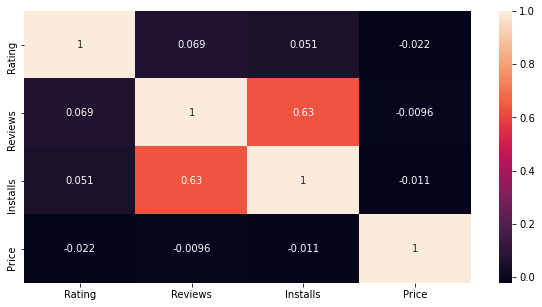

In [46]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
corr= df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [47]:
# procedure for converting the column "Size" to float
# there are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [48]:
# removing the "m" which is the mb for the size

df.Size= df["Size"].str.replace("M", "")
df.Size= df['Size'].str.replace("Varies with device","-1")

In [49]:
#Here we replace k and change the unit to Mb
df['Size']=df['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)

In [50]:
df.Size.unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '23',
       '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', '-1', '9.4', '15',
       '10', '1.2', '26', '8.0', '7.9', '56', '57', '35', '54', '0.2',
       '3.6', '5.7', '8.6', '2.4', '27', '2.7', '2.5', '7.0', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '22', '6.4', '3.2',
       '8.2', '4.9', '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0',
       '2.3', '2.1', '42', '9.1', '55', '0.0', '7.3', '6.5', '1.5', '7.5',
       '51', '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40',
       '7.8', '8.8', '6.6', '5.1', '61', '66', '0.1', '8.4', '3.7', '44',
       '0.7', '1.6', '6.2', '53', '1.4', '3.0', '7.2', '5.8', '3.8',
       '9.6', '45', '63', '49', '77', '4.4', '70', '9.3', '8.1', '36',
       '6.9', '7.4', '84', '97', '2.0', '1.9', '1.8', '5.

In [51]:
#As the columns of Genres is same as the column for category, we drop the column for Genres.
#Also, the column of android version, current version, Last updated are not of our use, so we drop these columns.
df.drop(['Genres','Last Updated','Current Ver',"Android Ver"],axis=1,inplace=True)

In [52]:
#Ensure that these columns are dropped.
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone


In [53]:
# Here we find the count of rating for each possible mean rating
rating_most=df.Rating.value_counts()


In [54]:
df.Rating.value_counts()

4.4    1030
4.3    1016
4.5     975
4.2     885
4.6     767
4.1     655
4.0     538
4.7     482
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

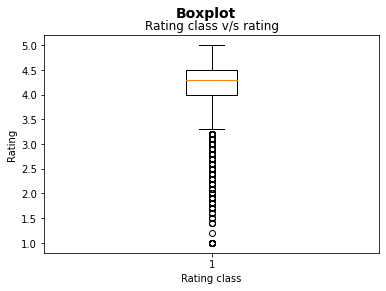

In [55]:
# figure related code
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(df['Rating'])
ax.set_title('Rating class v/s rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')

plt.show()

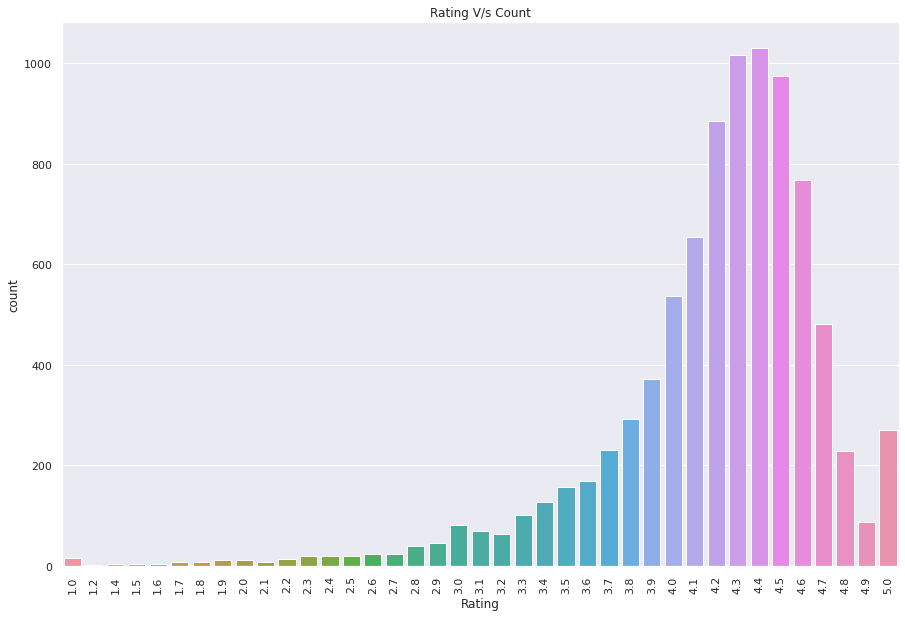

In [56]:
# Count plot for rating
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
#dat = sns.load_dataset("df")
plt.xticks(rotation=90)
plt.title("Rating V/s Count")
ax = sns.countplot(x="Rating", data=df)

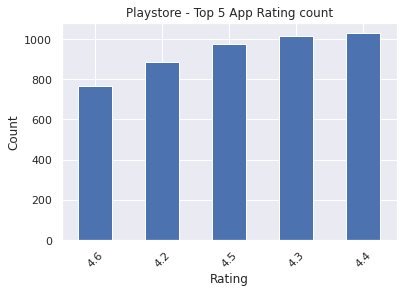

In [57]:
#We look at the top five value counts  for rating 
df["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar()
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)

plt.show()

In [58]:
# we make different classes/dataframes for the app rating
app_rating1=df[df['Rating'] >= 4]
app_rating2=df[(df['Rating'] < 4) & (df['Rating'] > 3 )]
app_rating3= df[df['Rating'] <=3]

In [59]:
#Checking the shape of each dataframe
app_rating1.shape,app_rating2.shape,app_rating3.shape

((6934, 9), (1582, 9), (362, 9))

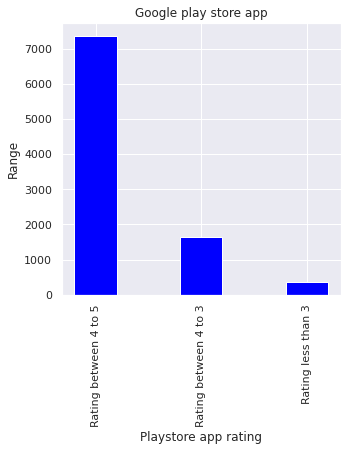

In [60]:
# creating the dataset
# Plot show there are more than 7000 apps having rating more than 4

data = {'Rating between 4 to 5':7363, 'Rating between 4 to 3':1627, 'Rating less than 3':370,
		}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(courses, values, color ='blue',
		width =0.4)

plt.xlabel("Playstore app rating")
plt.ylabel("Range")
plt.title("Google play store app")
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show>

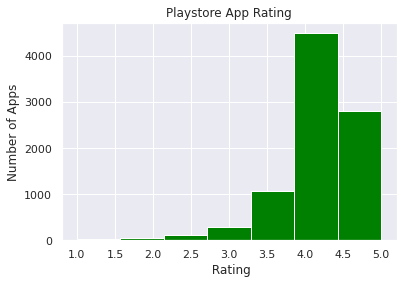

In [61]:
#Here we use the hist plot for the app rating
app_rating= df["Rating"]
num_bins=7
plt.hist(app_rating, num_bins, facecolor="green", alpha = 1)
plt.title('Playstore App Rating')
plt.xlabel(" Rating")
plt.ylabel("Number of Apps")
plt.show

In [62]:
#Here we try to find the apps with rating 5
df1=df[df['Rating']==5]

In [63]:
#There are 271 apps having rating 5
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 283 to 8875
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             271 non-null    object 
 1   Category        271 non-null    object 
 2   Rating          271 non-null    float64
 3   Reviews         271 non-null    float64
 4   Size            271 non-null    object 
 5   Installs        271 non-null    int64  
 6   Type            271 non-null    object 
 7   Price           271 non-null    float64
 8   Content Rating  271 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.2+ KB


In [64]:
#Here I try to sort app with rating 5 corresponding to installs and reviews
df1=df1.sort_values(by=['Installs','Reviews'], ascending=False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
7868,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10.0,3.0,10000,Free,0.00,Everyone
6711,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000,Free,0.00,Everyone
6861,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34.0,12,5000,Free,0.00,Everyone
6239,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24.0,3.2,5000,Free,0.00,Everyone
8544,Ríos de Fe,LIFESTYLE,5.0,141.0,15,1000,Free,0.00,Everyone
...,...,...,...,...,...,...,...,...,...
2063,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1.0,4.6,5,Free,0.00,Everyone
7637,EB Cash Collections,BUSINESS,5.0,1.0,4.3,5,Free,0.00,Everyone
2059,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25,1,Free,0.00,Everyone


In [65]:
#Value count of each category for the apps with rating 5
df1.Category.value_counts(ascending=False)

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
FINANCE                 8
PRODUCTIVITY            8
NEWS_AND_MAGAZINES      7
SHOPPING                6
EVENTS                  6
PHOTOGRAPHY             6
DATING                  6
BOOKS_AND_REFERENCE     6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
COMICS                  2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

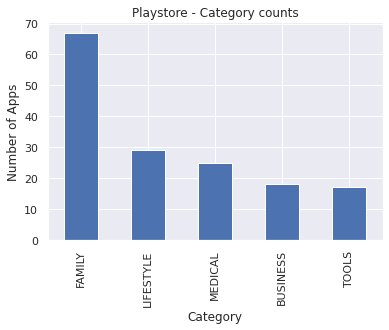

In [66]:
#Top five categories with respect to value count of app (rating=5)
df1.Category.value_counts(ascending=False).nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts")
plt.show()

In [67]:
#We read the top five categories in the apps
df["Category"].value_counts().nlargest(5).sort_values(ascending=False)

FAMILY          1711
GAME            1074
TOOLS            732
PRODUCTIVITY     334
FINANCE          317
Name: Category, dtype: int64

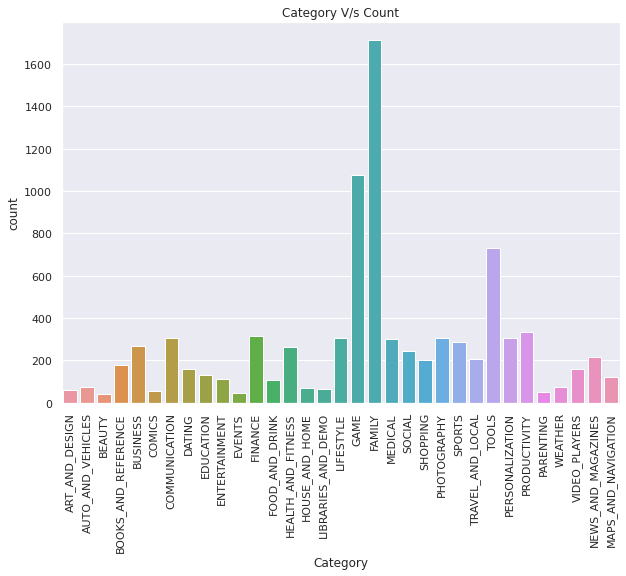

In [68]:
#df.Category.value_counts()
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
#dat = sns.load_dataset("df")
plt.xticks(rotation=90)
plt.title("Category V/s Count")
ax = sns.countplot(x="Category", data=df)

In [69]:
# Getting the measures of central tendency for all the installation grouped by "Category"

df.groupby("Category").Installs.agg(["min", "mean", "median", "max"])

,min,mean,median,max
Category,,,,
ART_AND_DESIGN,100,2.036526e+06,100000,50000000
AUTO_AND_VEHICLES,100,7.278055e+05,100000,10000000
BEAUTY,100,6.408619e+05,100000,10000000
BOOKS_AND_REFERENCE,5,1.082651e+07,100000,1000000000
BUSINESS,5,3.198215e+06,10000,100000000
COMICS,100,9.661397e+05,100000,10000000
COMMUNICATION,10,7.867180e+07,1000000,1000000000
DATING,10,1.298883e+06,100000,10000000
EDUCATION,1000,4.138388e+06,1000000,100000000


In [70]:
# Sorting (descending sorting) the dataframe by number of installs

df.sort_values(by="Installs", ascending= False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
339,Hangouts,COMMUNICATION,4.0,3419433.0,-1,1000000000,Free,0.0,Everyone
3159,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
3494,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,-1,1000000000,Free,0.0,Everyone
3313,Instagram,SOCIAL,4.5,66509917.0,-1,1000000000,Free,0.0,Teen
2168,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [71]:
#Here we make dataframe for top most installed apps
top_installed_apps=df.sort_values(by="Installs", ascending= False)

In [72]:
#We read first 5 rows of this dataframe
top_installed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
339,Hangouts,COMMUNICATION,4.0,3419433.0,-1,1000000000,Free,0.0,Everyone
3159,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
3494,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,-1,1000000000,Free,0.0,Everyone
3313,Instagram,SOCIAL,4.5,66509917.0,-1,1000000000,Free,0.0,Teen
2168,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [73]:
# Apps with 1 billion installations (1b is the 1st greater class of installations in the dataset)
#There are 49 apps with greater than 1 billion installation
len(df[df["Installs"]>= 1000000000])

49

In [74]:
#Now making another dataframe that gives most installed and most rated apps
top_installed_and_rated_apps = df.sort_values(by=["Installs", "Rating"], ascending=False)
top_installed_and_rated_apps.head() # main top apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
1365,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
1411,Subway Surfers,GAME,4.5,27723193.0,76,1000000000,Free,0.0,Everyone 10+
1458,Subway Surfers,GAME,4.5,27724094.0,76,1000000000,Free,0.0,Everyone 10+
1573,Subway Surfers,GAME,4.5,27725352.0,76,1000000000,Free,0.0,Everyone 10+
2110,Instagram,SOCIAL,4.5,66577313.0,-1,1000000000,Free,0.0,Teen


In [75]:
#Now, we make dataframe for most installed and reviewed apps
top_installed_and_reviewed_apps = df.sort_values(by=["Installs", "Reviews"], ascending=False)
top_installed_and_reviewed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
2109,Facebook,SOCIAL,4.1,78158306.0,-1,1000000000,Free,0.0,Teen
3347,Facebook,SOCIAL,4.1,78128208.0,-1,1000000000,Free,0.0,Teen
290,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone
3308,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1,1000000000,Free,0.0,Everyone
2168,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [76]:
#Making another dataframe having 10 rows of the dataframetop_installed_and_rated_apps
top_10_installed_and_rated_apps= top_installed_and_rated_apps.head(10)

In [77]:
#finding top 10 installed and rated app 
top_10_installed_and_rated_apps.Category.sort_values(ascending=False)

id
2168         SOCIAL
2110         SOCIAL
2395    PHOTOGRAPHY
2366    PHOTOGRAPHY
2321    PHOTOGRAPHY
3300           GAME
1573           GAME
1458           GAME
1411           GAME
1365           GAME
Name: Category, dtype: object

In [78]:
# There are totally 8190 apps
df["App"].nunique()

8190

In [79]:
#Top 10 installed and rated apps in accordance with content rating
top_10_installed_and_rated_apps["Content Rating"].sort_values(ascending=False)

id
2168            Teen
2110            Teen
3300    Everyone 10+
1573    Everyone 10+
1458    Everyone 10+
1411    Everyone 10+
1365    Everyone 10+
2395        Everyone
2366        Everyone
2321        Everyone
Name: Content Rating, dtype: object

In [80]:
df["Content Rating"].nunique()

6

In [82]:
# There are totally 6 categories of content rating

# In the top 10 installed and rated apps, there are 3 different content ratings

# I will now see their performance in the whole dataset, along with the other 3 remaining content ratings in the whole dataset

count_Teen=0
count_Everyone_10 = 0
count_Everyone=0

count_Mature_17=0
count_Adults_only_18=0
count_Unrated=0


for x in df["Content Rating"]:
    if x== "Teen":
        count_Teen= count_Teen+1
    elif x== "Everyone 10+":
        count_Everyone_10= count_Everyone_10+1
    elif x== "Everyone":
        count_Everyone= count_Everyone+1
    elif x== "Mature 17+":
        count_Mature_17 = count_Mature_17+1
    elif x== "Adults only 18+":
        count_Adults_only_18= count_Adults_only_18+1
    elif x== "Unrated":
        count_Unrated= count_Unrated+1
print ("Number of apps of all the dataset, having the content rating which belong the top apps:\n")
print ("Number of apps that belong to the content rating \"Teen\" is: {}\n".format(count_Teen))
print ("Number of apps that belong to the content rating \"Everyone 10+\" is: {}\n".format(count_Everyone_10))
print ("Number of apps that belong to the content rating \"Everyone\" is: {}\n".format(count_Everyone))
print ("Number of apps having content rating not included in the top apps\n")
print ("Number of apps that belong to the content rating \"Mature 17+\" is: {}".format(count_Mature_17))
print ("Number of apps that belong to the content rating \"Adults only 18+\" is: {}".format(count_Adults_only_18))
print ("Number of apps that belong to the content rating \"Unrated\" is: {}".format(count_Unrated))



Number of apps of all the dataset, having the content rating which belong the top apps:

Number of apps that belong to the content rating "Teen" is: 1021

Number of apps that belong to the content rating "Everyone 10+" is: 359

Number of apps that belong to the content rating "Everyone" is: 7083

Number of apps having content rating not included in the top apps

Number of apps that belong to the content rating "Mature 17+" is: 411
Number of apps that belong to the content rating "Adults only 18+" is: 3
Number of apps that belong to the content rating "Unrated" is: 1


In [83]:
#Count for content rating in each of the category
df["Content Rating"].value_counts(ascending=False)

Everyone           7083
Teen               1021
Mature 17+          411
Everyone 10+        359
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

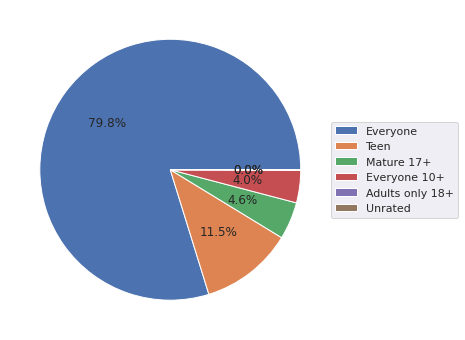

In [84]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Content Rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

In [85]:
# In this and in the next 2 commands, i will try to see if there is any correlation between installations, Rating and Reviews

top_10_installed_and_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
1365,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
1411,Subway Surfers,GAME,4.5,27723193.0,76,1000000000,Free,0.0,Everyone 10+
1458,Subway Surfers,GAME,4.5,27724094.0,76,1000000000,Free,0.0,Everyone 10+
1573,Subway Surfers,GAME,4.5,27725352.0,76,1000000000,Free,0.0,Everyone 10+
2110,Instagram,SOCIAL,4.5,66577313.0,-1,1000000000,Free,0.0,Teen
2168,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen
2321,Google Photos,PHOTOGRAPHY,4.5,10858556.0,-1,1000000000,Free,0.0,Everyone
2366,Google Photos,PHOTOGRAPHY,4.5,10858538.0,-1,1000000000,Free,0.0,Everyone
2395,Google Photos,PHOTOGRAPHY,4.5,10859051.0,-1,1000000000,Free,0.0,Everyone


In [ ]:
# Reading top apps sorted using rating

In [86]:
df.sort_values(by="Rating", ascending= False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
7887,Shabad Gurubani Punjabi mp3 free - Ek Onkar Sa...,FAMILY,5.0,5.0,64,100,Free,0.0,Everyone
7873,Asha Ek Hope - ALS/ MND,MEDICAL,5.0,2.0,11,100,Free,0.0,Everyone
8389,FA Player Essentials,SPORTS,5.0,7.0,68,100,Free,0.0,Everyone
6162,CJ Gospel Hour,SOCIAL,5.0,7.0,18,100,Free,0.0,Everyone
6152,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0,15.0,1.4,1000,Free,0.0,Everyone


In [87]:
#Here we read top  apps sorted by reviews
df.sort_values(by="Reviews", ascending= False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
2109,Facebook,SOCIAL,4.1,78158306.0,-1,1000000000,Free,0.0,Teen
3347,Facebook,SOCIAL,4.1,78128208.0,-1,1000000000,Free,0.0,Teen
290,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone
3308,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1,1000000000,Free,0.0,Everyone
2168,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [88]:
top_10_installed_and_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
id,,,,,,,,,
1365,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
1411,Subway Surfers,GAME,4.5,27723193.0,76,1000000000,Free,0.0,Everyone 10+
1458,Subway Surfers,GAME,4.5,27724094.0,76,1000000000,Free,0.0,Everyone 10+
1573,Subway Surfers,GAME,4.5,27725352.0,76,1000000000,Free,0.0,Everyone 10+
2110,Instagram,SOCIAL,4.5,66577313.0,-1,1000000000,Free,0.0,Teen
2168,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen
2321,Google Photos,PHOTOGRAPHY,4.5,10858556.0,-1,1000000000,Free,0.0,Everyone
2366,Google Photos,PHOTOGRAPHY,4.5,10858538.0,-1,1000000000,Free,0.0,Everyone
2395,Google Photos,PHOTOGRAPHY,4.5,10859051.0,-1,1000000000,Free,0.0,Everyone


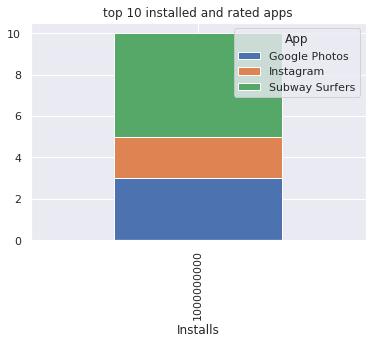

In [89]:
# We are looking for the top 10 apps that are installed and rated.
app4= top_10_installed_and_rated_apps
top_apps=app4.groupby(["Installs", "App"]).size().unstack()
top_apps.plot(kind="bar",stacked=True)
plt.title('top 10 installed and rated apps')
ax=plt.gca()
plt.show()

In [90]:
# Prices of the apps
df["Price"].value_counts().sort_values(ascending=False).head(10)

0.00    8268
2.99     110
0.99     104
4.99      68
1.99      59
3.99      55
1.49      30
2.49      20
9.99      14
5.99      14
Name: Price, dtype: int64

In [91]:
df.Price.nunique()

73

In [92]:
df.Type.value_counts()

Free    8268
Paid     610
Name: Type, dtype: int64

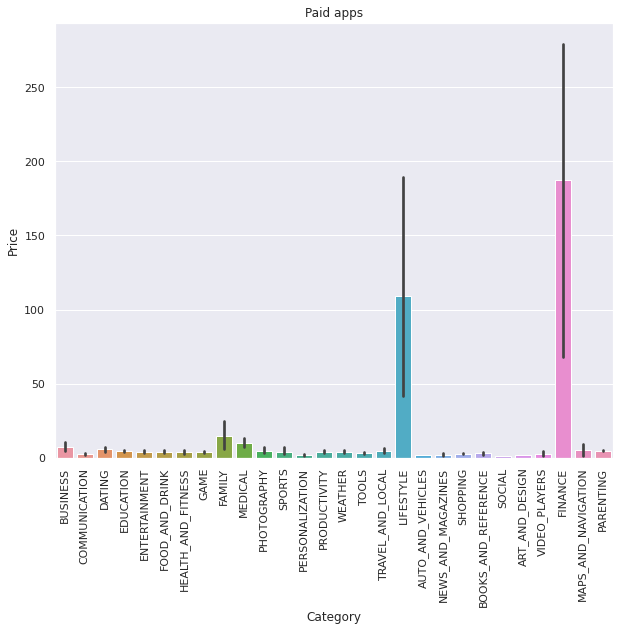

In [93]:
#Let's look at why family even though has lot of apps does not have the highest number of installs. Price could be one of the factors
paid_apps = df[df["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=paid_apps,
            label="Total Paid Apps in Each Category")
plt.title("Paid apps")
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Above plot shows that the apps in the category Lifestyle and Finance have the highest prices.

In [94]:
#Here we look for the top five prices and the number of apps 
df["Price"].value_counts().nlargest(5).sort_values(ascending=False)

0.00    8268
2.99     110
0.99     104
4.99      68
1.99      59
Name: Price, dtype: int64

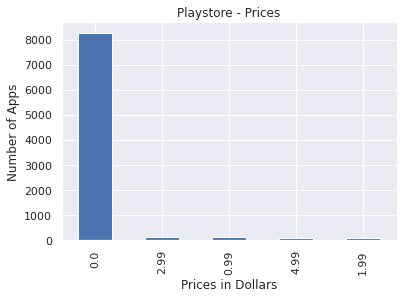

In [95]:
#Now we visualize it by using bar plot
#This plot shows that data has more than 90% apps that are free 
df["Price"].value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Prices in Dollars")
plt.title("Playstore - Prices")
plt.show()

(-1.1006390573344684,
 1.1000304313016414,
 -1.100484172839783,
 1.1024946974786016)

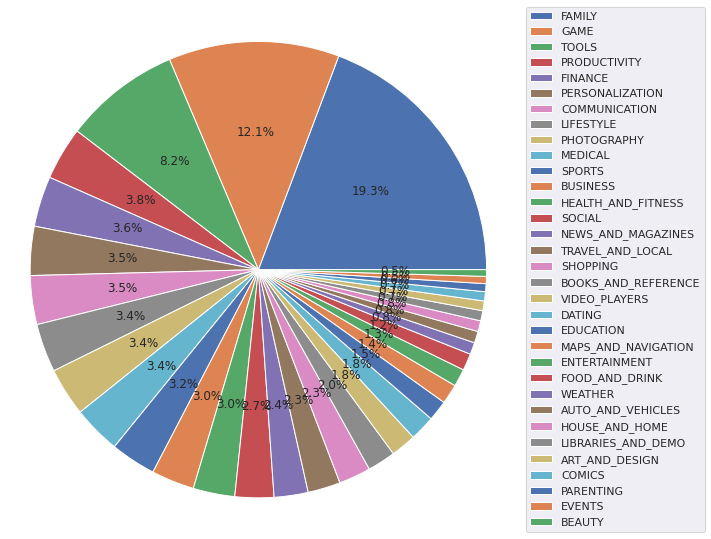

In [96]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

In [97]:
# Here we see the category and count of top 100 installed apps
top_installed_and_rated_apps["Category"].head(100).value_counts()

COMMUNICATION          24
GAME                   19
TOOLS                  10
SOCIAL                  9
PRODUCTIVITY            9
NEWS_AND_MAGAZINES      7
VIDEO_PLAYERS           6
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
FAMILY                  4
HEALTH_AND_FITNESS      1
ENTERTAINMENT           1
BOOKS_AND_REFERENCE     1
Name: Category, dtype: int64

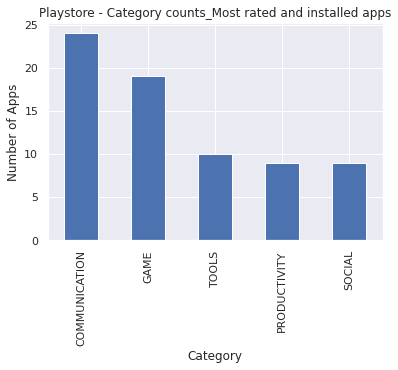

In [98]:
#Here We use the barplot to see the value counts of category in the top installed and rated apps
top_installed_and_rated_apps["Category"].head(100).value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts_Most rated and installed apps")
plt.show()

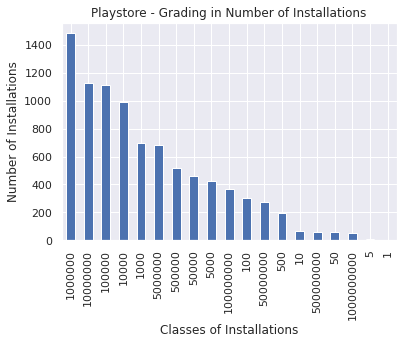

In [99]:
# Relationship betweeen: Classes and number of Installations

df["Installs"].value_counts().plot.bar()
plt.ylabel("Number of Installations")
plt.xlabel("Classes of Installations")
plt.title("Playstore - Grading in Number of Installations")
plt.show()

In [100]:
# Top 5 Gradings in the number of installations

df["Installs"].value_counts().nlargest(5)

1000000     1484
10000000    1128
100000      1110
10000        988
1000         696
Name: Installs, dtype: int64

In [101]:
#we look at the classes of content rating and their value counts
df["Content Rating"].value_counts()

Everyone           7083
Teen               1021
Mature 17+          411
Everyone 10+        359
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

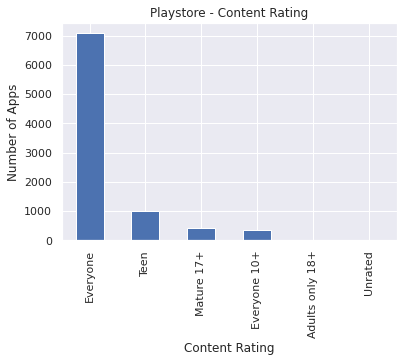

In [102]:
#Plot for content rating
#This plot shows that more than 7000 apps allows the content reviews to everyone
df["Content Rating"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Content Rating")
plt.title("Playstore - Content Rating")
plt.show()

In [103]:
#The top 100 installed and rated apps corresponding to their content rating classes and the value count
top_installed_and_rated_apps["Content Rating"].head(100).value_counts()

Everyone        71
Teen            20
Everyone 10+     7
Mature 17+       2
Name: Content Rating, dtype: int64

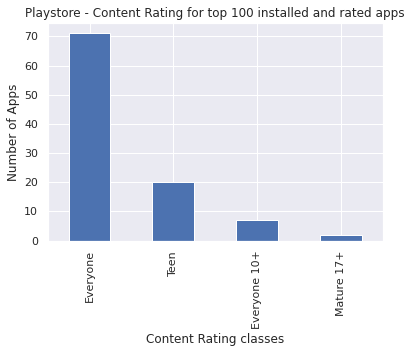

In [104]:
#we use the barplot to visualize above information
top_installed_and_rated_apps["Content Rating"].head(100).value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Content Rating classes")
plt.title("Playstore - Content Rating for top 100 installed and rated apps")
plt.show()

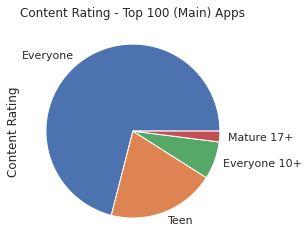

In [105]:
#Here we look for the content rating distribution using pie chart
app1=top_installed_and_rated_apps.head(100)
app1["Content Rating"].value_counts().plot.pie()
plt.title("Content Rating - Top 100 (Main) Apps")
plt.show()

In [106]:
#Here we are looking for the top 100 installed and rated apps classes for the classes
top_installed_and_rated_apps.head(100).Installs.value_counts(ascending=False) 

500000000     51
1000000000    49
Name: Installs, dtype: int64

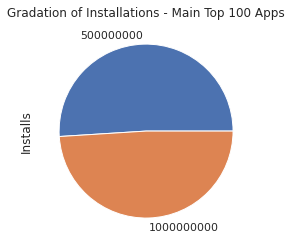

In [107]:
# Pie chart below gives the gradation of installation for top 100 rated and installed apps
app2= top_installed_and_rated_apps.head(100)
app2["Installs"].value_counts().plot.pie()
plt.title("Gradation of Installations - Main Top 100 Apps")
plt.show()

In [108]:
# Give path to access the data
path1='/content/drive/MyDrive/capstone project 1/Copy of User Reviews.csv'

In [109]:
# Read files using pandas modules
user_dat=pd.read_csv(path1)

In [110]:
# Read the first five rows in the data
user_dat.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [111]:
user_dat.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [112]:
#Read the number of unique categories in the dataset
user_dat.App.nunique()

1074

In [113]:
#Read the information in the dataset
user_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [114]:
#Dropping the rows corresponding to nan values
user=user_dat.dropna()

In [115]:
#Now this dataset does not contain nan values
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [116]:
#After dropping nan value rows, we observe that more than 200 apps were deleted
user.App.nunique()

865

In [117]:
#Look at the statistical information of the dataframe
user.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [118]:
#For the column sentiment, we find the count of each sentiment in the dataset
user.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

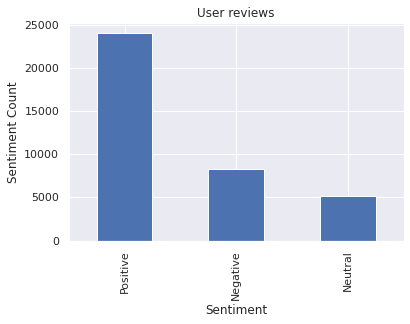

In [119]:
#The barplot of the sentiment count shows that more than 60% of the sentiment is positive
user["Sentiment"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Sentiment Count")
plt.xlabel("Sentiment")
plt.title("User reviews")
plt.show()

In [120]:
#Each app has different sentiments. so we use groupbymethod for app
data=user.groupby("App")
data.mean()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964


In [121]:
#Reading maximum value of each of sentiment, sentiment polarity and sentiment subjectivity for each app
data.max()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,nice super get,Positive,1.000000,1.00
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.910000,1.00
11st,good good,Positive,1.000000,1.00
1800 Contacts - Lens Store,great,Positive,0.838542,1.00
1LINE – One Line with One Touch,yoko,Positive,1.000000,1.00
...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,would actually load anything. I tried uninstal...,Positive,0.700000,0.95
Hotspot Shield Free VPN Proxy & Wi-Fi Security,നോട naffgggg,Positive,1.000000,1.00
Hotstar,running,Positive,1.000000,1.00


In [122]:
#Read the minimum values
data.min()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,10 best foods 4u Excellent chose foods,Negative,-0.800000,0.0
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,104 job hunt So amazing.. easy use.. thanx guys,Negative,-0.112500,0.0
11st,0 points I want to give No -10000000000000 poi...,Negative,-1.000000,0.0
1800 Contacts - Lens Store,Contacts shipped time efficient.,Negative,-0.300000,0.0
1LINE – One Line with One Touch,Cool,Negative,-0.825000,0.0
...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,"Always able get room, matter time frame locati...",Negative,-0.988281,0.0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial 8000 year charges,Negative,-0.700000,0.0
Hotstar,2 issues. 1st subtitles get downloading videos...,Negative,-0.555556,0.0


In [123]:
#Create a new dataframe that sorts the dataframe corresponding to mean of the data in accordence with sentiment polarity and sentiment subjectivity
df1=data.mean().sort_values(by=["Sentiment_Polarity","Sentiment_Subjectivity"],ascending=[False,False])

In [124]:
#Here we look for the top positively user reviewed apps
top_positively_user_reviewed_apps=df1.head()
top_positively_user_reviewed_apps

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
HomeWork,1.000000,0.300000
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Bed Time Fan - White Noise Sleep Sounds,0.781250,0.600000
Cameringo Lite. Filters Camera,0.770269,0.533333


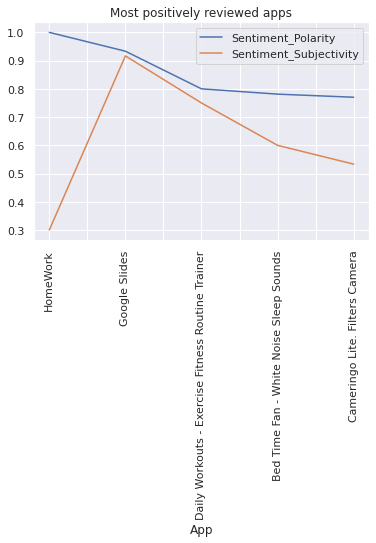

In [125]:
#We plot the line graph for the above dataframe
top_positively_user_reviewed_apps.plot()
plt.xticks(rotation=90)
plt.title("Most positively reviewed apps")
plt.show()

In [126]:
# Here we look for the most negatively reviewed apps
most_negatively_reviewed_apps=df1.tail()
most_negatively_reviewed_apps

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Call of Duty:Black Ops Zombies,-0.162120,0.442716
Fruit Block - Puzzle Legend,-0.183333,0.377778
DEER HUNTER 2018,-0.383333,0.433333
Google Street View,-0.500000,0.691667
Draw Your Game,-0.668490,0.683333


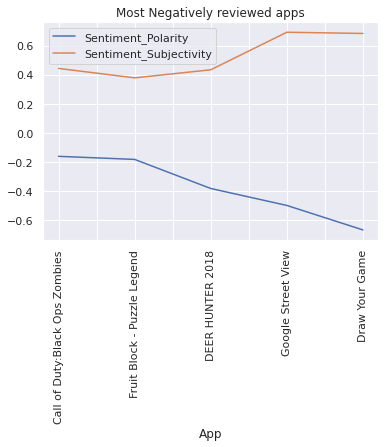

In [127]:
#Line graph for above dataframe
most_negatively_reviewed_apps.plot()
plt.xticks(rotation=90)
plt.title('Most Negatively reviewed apps')
plt.show()

In [128]:
#Here we find the apps such that their feedback is neutral
df2=data.mean()[(data.mean()['Sentiment_Polarity']==0) & (data.mean()['Sentiment_Subjectivity']==0)]

In [129]:
#Read this dataframe
df2

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
CBS News,0.0,0.0
HD Camera,0.0,0.0
